In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [2]:
#read csv where y values are balanced
df = pd.read_csv('balanced_y.csv')

In [3]:
#drop unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
#select columns, which have significant scores (based on p values)
df = df[['male', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose', 'TenYearCHD']]

In [5]:
#split to train test values
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, 
                                                    random_state=42)

In [6]:
#perform Logistic Regression and see accuracy score
#even though we dropped a lot of variables, we still could predict 
#with the same accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
accuracy_score(y_test, predictions)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6632996632996633

In [7]:
#Let's see classification report
#f1 score is also looks same
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       160
           1       0.62      0.72      0.66       137

    accuracy                           0.66       297
   macro avg       0.67      0.67      0.66       297
weighted avg       0.67      0.66      0.66       297



In [8]:
#What we have to achieve is to increase 98
confusion_matrix(y_test, predictions)

array([[99, 61],
       [39, 98]], dtype=int64)

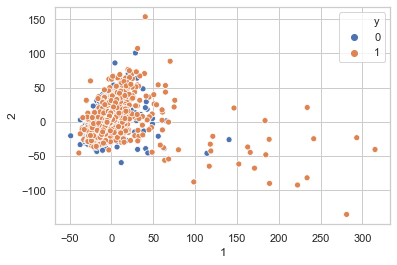

In [9]:
#Let's perform primary component analysis
#And plot it out to see whether we can clear separation
from sklearn.decomposition import PCA
pca = PCA(2)
transformed = pca.fit_transform(df.drop('TenYearCHD', axis=1))
df1 = pd.DataFrame()
df1['1'] = transformed[:,0]
df1['2'] = transformed[:,1]
df1['y'] = df['TenYearCHD']
sns.scatterplot(df1['1'], df1['2'], data=df1, hue=df1['y'])
#scatterplot: y's are separated
#As you can see there is no clear separation

In [10]:
#Let's perform random forest classifier
#As you will see, logistic regression performs better
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy_score(y_test, pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5858585858585859

In [11]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       160
           1       0.55      0.58      0.57       137

    accuracy                           0.59       297
   macro avg       0.59      0.59      0.58       297
weighted avg       0.59      0.59      0.59       297



In [12]:
#With XGBoost is the same problem, Logistic Regression performs better
from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.5656565656565656

In [13]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58       160
           1       0.53      0.58      0.55       137

    accuracy                           0.57       297
   macro avg       0.57      0.57      0.57       297
weighted avg       0.57      0.57      0.57       297



In [14]:
#As we saw, logistic regression is better than most of the models
#What we can do finally is to change treshhold
#As a default it is 0.5
#Accuracy score dropped
#But we could significantly increase predictet 1 values
predlg = np.where(lg.predict_proba(X_test)[:,1] > 0.3, 1, 0)
accuracy_score(y_test, predlg)

0.5252525252525253

In [15]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

           0       0.79      0.16      0.27       160
           1       0.49      0.95      0.65       137

    accuracy                           0.53       297
   macro avg       0.64      0.56      0.46       297
weighted avg       0.65      0.53      0.44       297



In [16]:
confusion_matrix(y_test, predlg)

array([[ 26, 134],
       [  7, 130]], dtype=int64)

In [18]:
df.to_csv('Significant_variables_Balanced_ys.csv')